In [1]:
import numpy as np
import pandas as pd


from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier 
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from zodiac.zodiac import Zodiac

### Load the data and store the train and test labels seperately

In [7]:
test = pd.read_csv('data/mnist_test.csv')
train = pd.read_csv('data/mnist_train.csv')

In [8]:
train_x = train['label']
del train['label']
res = np.array(test["label"])
del test["label"]

### Train your models, for our experiments we will be trying 

### 1) Random Forests 

In [9]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(train, train_x) 

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [10]:
RF_pred = clf.predict(test)

In [11]:
print(classification_report(res,RF_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.93      0.95      0.94      1032
           3       0.92      0.95      0.93      1010
           4       0.94      0.95      0.95       982
           5       0.94      0.91      0.92       892
           6       0.96      0.96      0.96       958
           7       0.96      0.94      0.95      1028
           8       0.94      0.91      0.92       974
           9       0.94      0.92      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



### 2) Naive Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
NB_pred = gnb.fit(train, np.array(train_x)).predict(test)

In [16]:
print(classification_report(res,NB_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       980
           1       0.85      0.95      0.90      1135
           2       0.90      0.26      0.40      1032
           3       0.71      0.35      0.47      1010
           4       0.88      0.17      0.29       982
           5       0.55      0.05      0.09       892
           6       0.65      0.93      0.77       958
           7       0.88      0.27      0.42      1028
           8       0.28      0.67      0.40       974
           9       0.37      0.95      0.53      1009

    accuracy                           0.56     10000
   macro avg       0.69      0.55      0.51     10000
weighted avg       0.69      0.56      0.52     10000



### Using Zodiac to visualize model performance with grids

In [17]:
#initialize zodiac with data values and model predictions

RF_zod = Zodiac(train_data=train,test_data=test,test_labels=res, 
             test_predictions=RF_pred, model_type="multiclass",dim_red="PCA") 


NB_zod = Zodiac(train_data=train,test_data=test,test_labels=res, 
             test_predictions=NB_pred, model_type="multiclass",dim_red="PCA")

/Users/apoorvashetty/ze/zodiac/zodiac.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.test_data["labels"] = test_labels
/Users/apoorvashetty/ze/zodiac/zodiac.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.test_data["predictions"] = test_predictions
/Users/apoorvashetty/ze/zodiac/zodiac.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

In [18]:
#Set metrics
RF_zod.set_metrics(metrics=["f1","accuracy","recall","precision"],average="macro")

NB_zod.set_metrics(metrics=["f1","accuracy","recall","precision"],average="macro")

Setting metrics..
Metrics set
Setting metrics..
Metrics set


In [19]:
#generate manual grids
RF_zod.split_manual_grid(h=100)

NB_zod.split_manual_grid(h=100)

Splitting the data into grids...
Generating density matrix...


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Completed
Splitting the data into grids...
Generating density matrix...
Completed


/Users/apoorvashetty/ze/zodiac/zodiac.py:231: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.test_data["color"] = self.test_data["labels"] == self.test_data["predictions"]
No handles with labels found to put in legend.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value 

<Figure size 432x288 with 0 Axes>

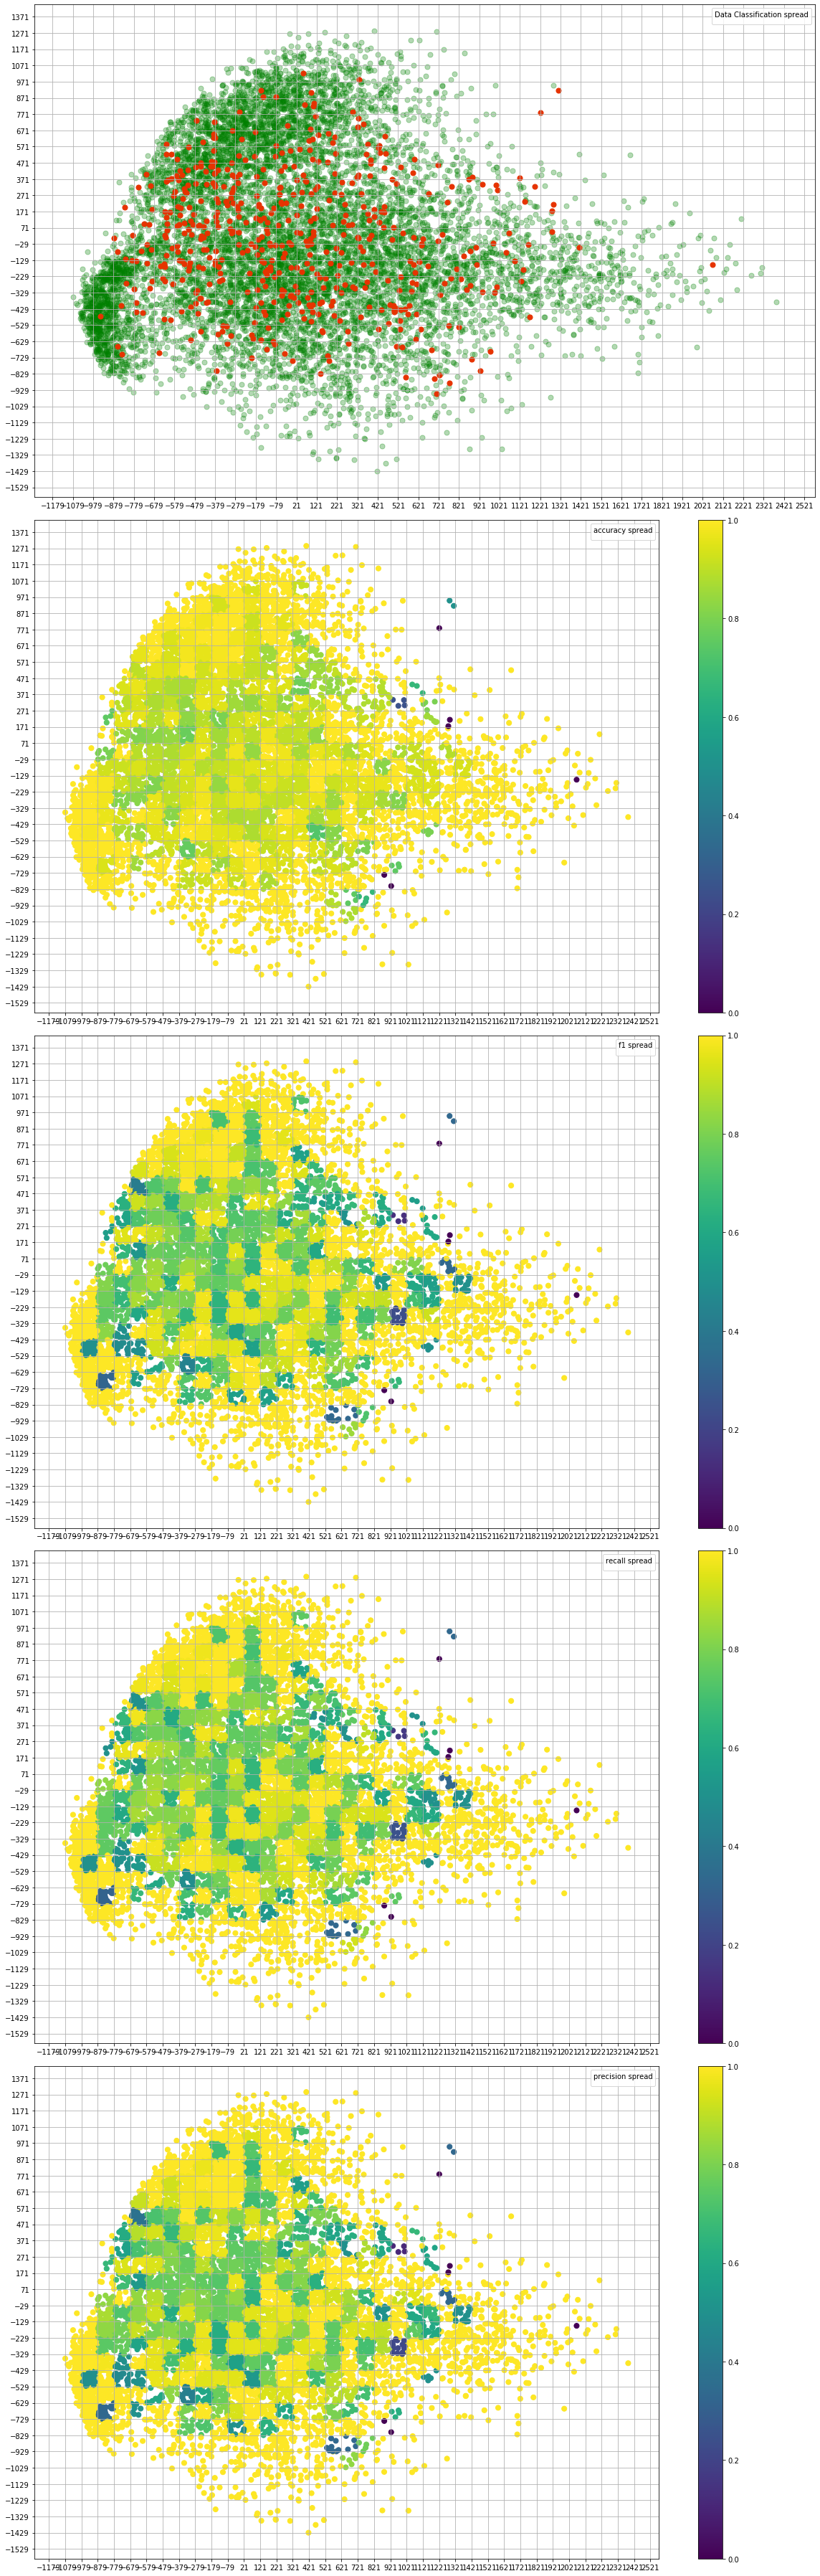

In [20]:
#Random forest plot
RF_zod.split_plot(metrics=["accuracy","f1","recall","precision"])  #pass only the metrics you want to visualize

No handles with labels found to put in legend.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

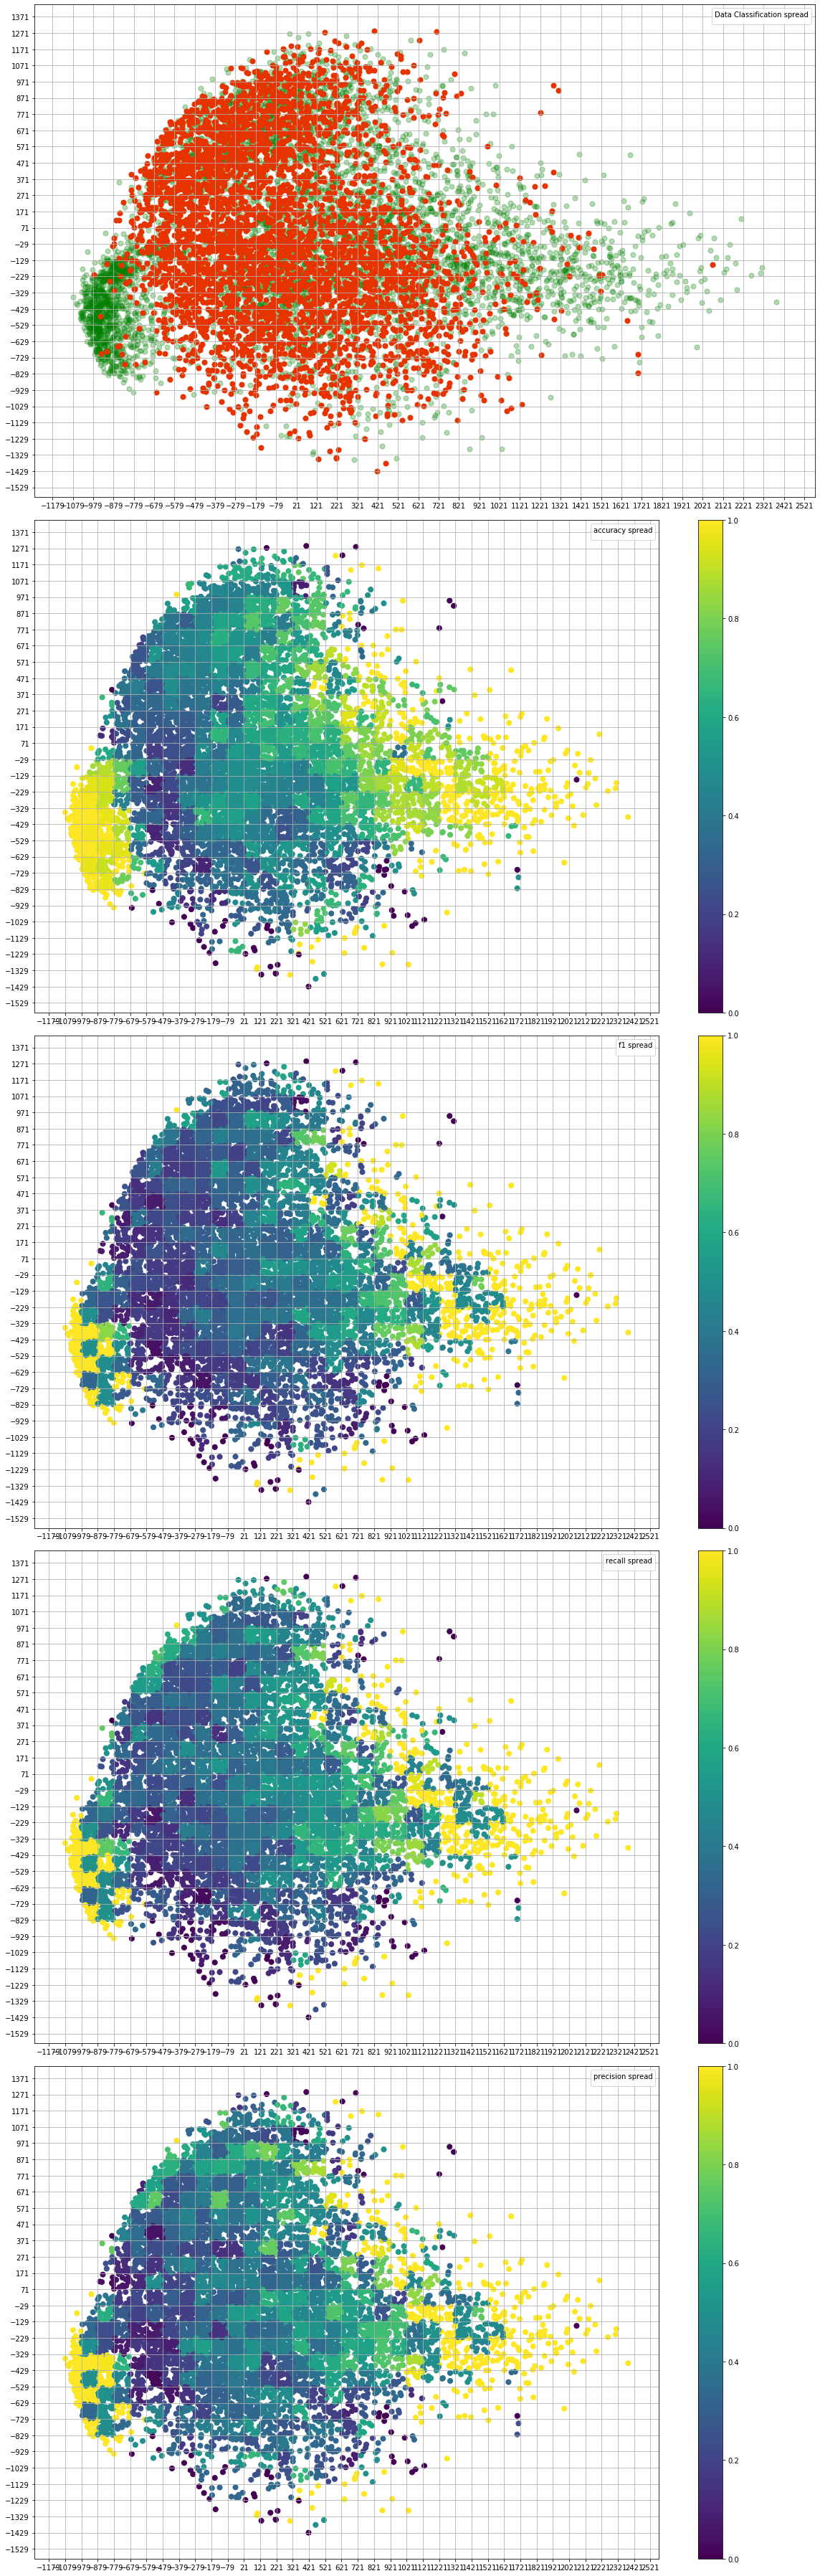

In [21]:
#Random forest plot
NB_zod.split_plot(metrics=["accuracy","f1","recall","precision"])

### Using zodiac to visualize model performance with parzen windows

In [22]:
#Generate parzen windows
RF_zod.gen_parzen(radius = 100)

NB_zod.gen_parzen(radius = 100)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

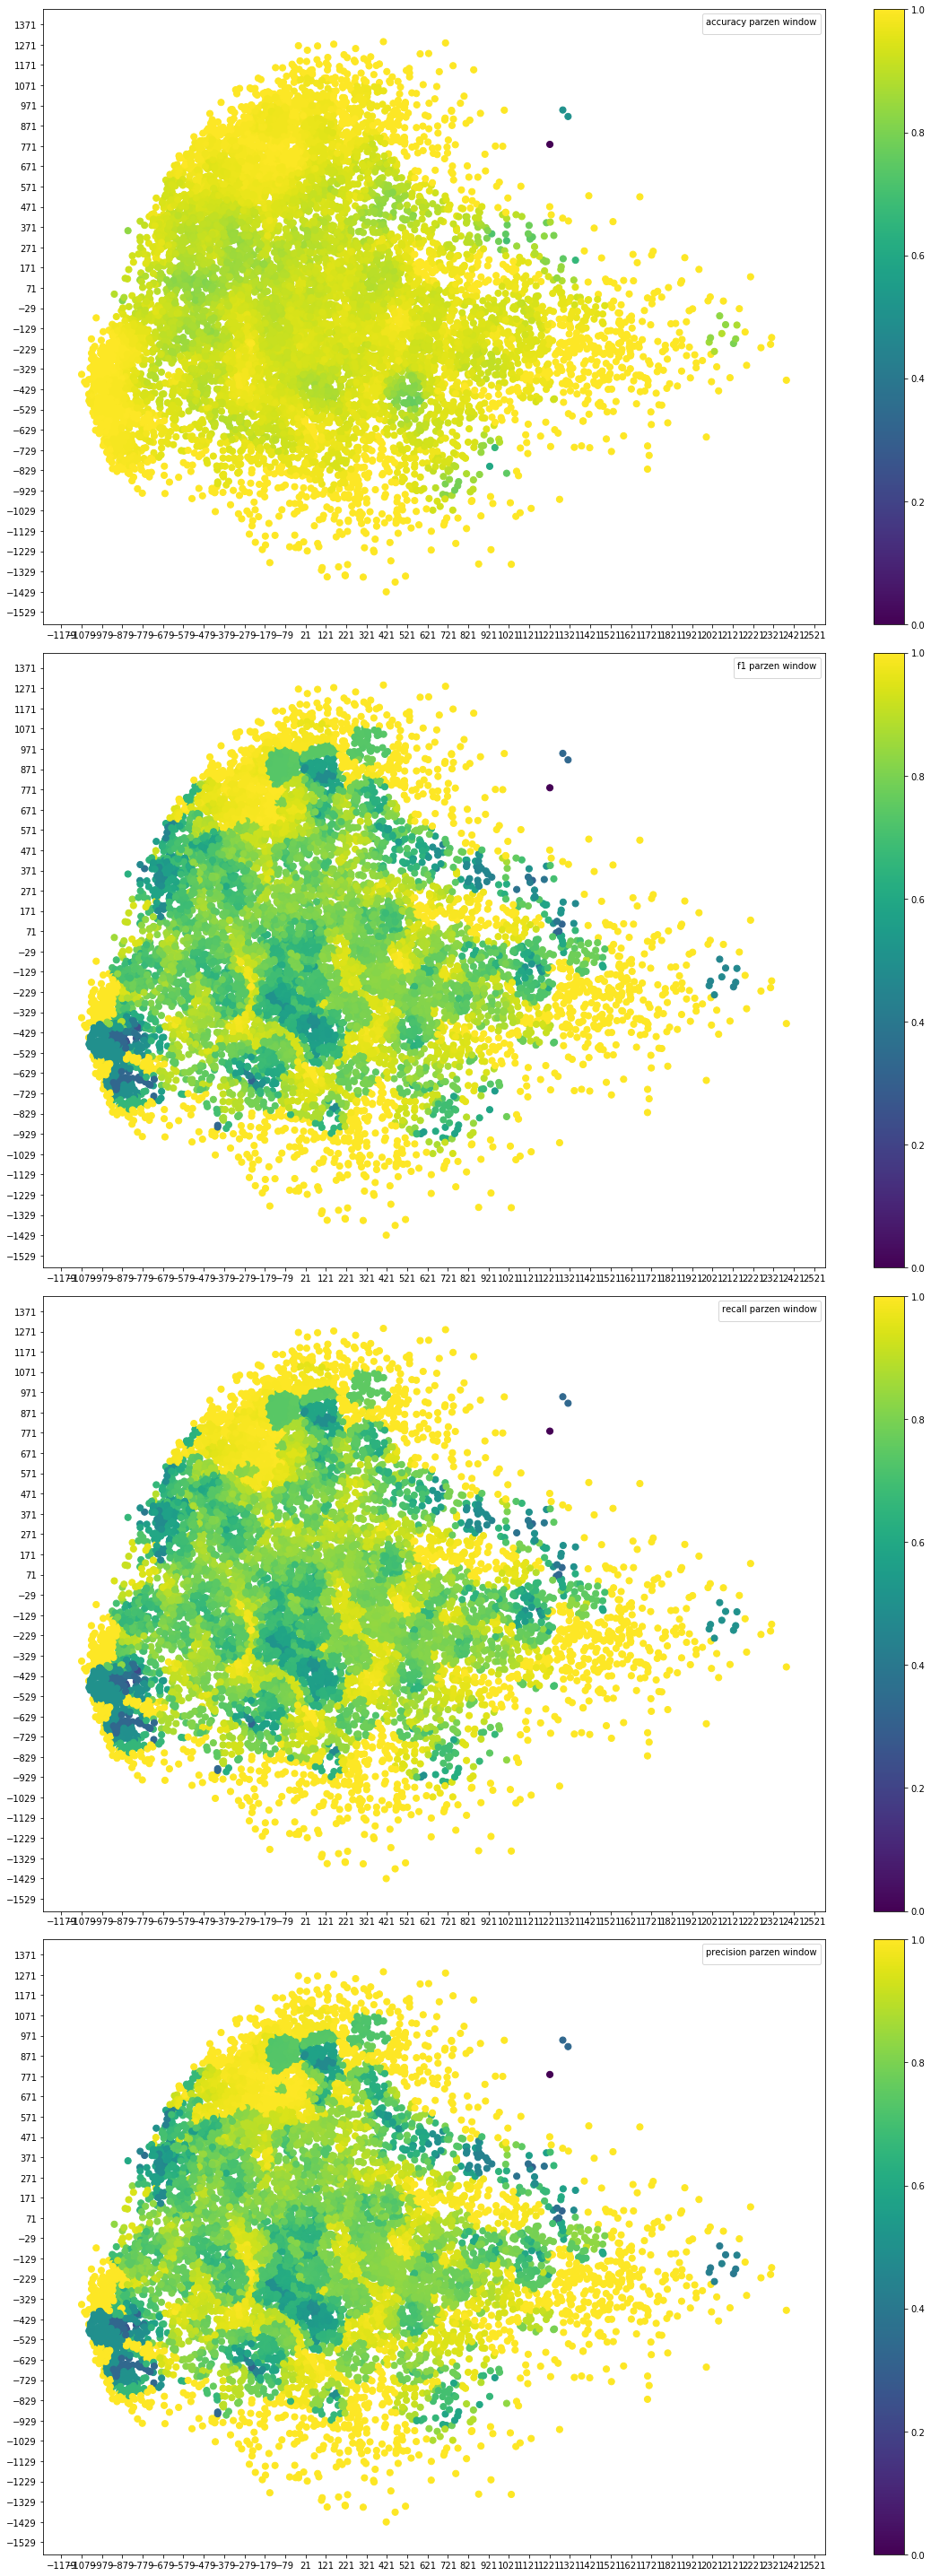

In [23]:
#Random forest plots
RF_zod.parzen_plot(metrics=["accuracy","f1","recall","precision"]) #pass only the metrics you want to visualize

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

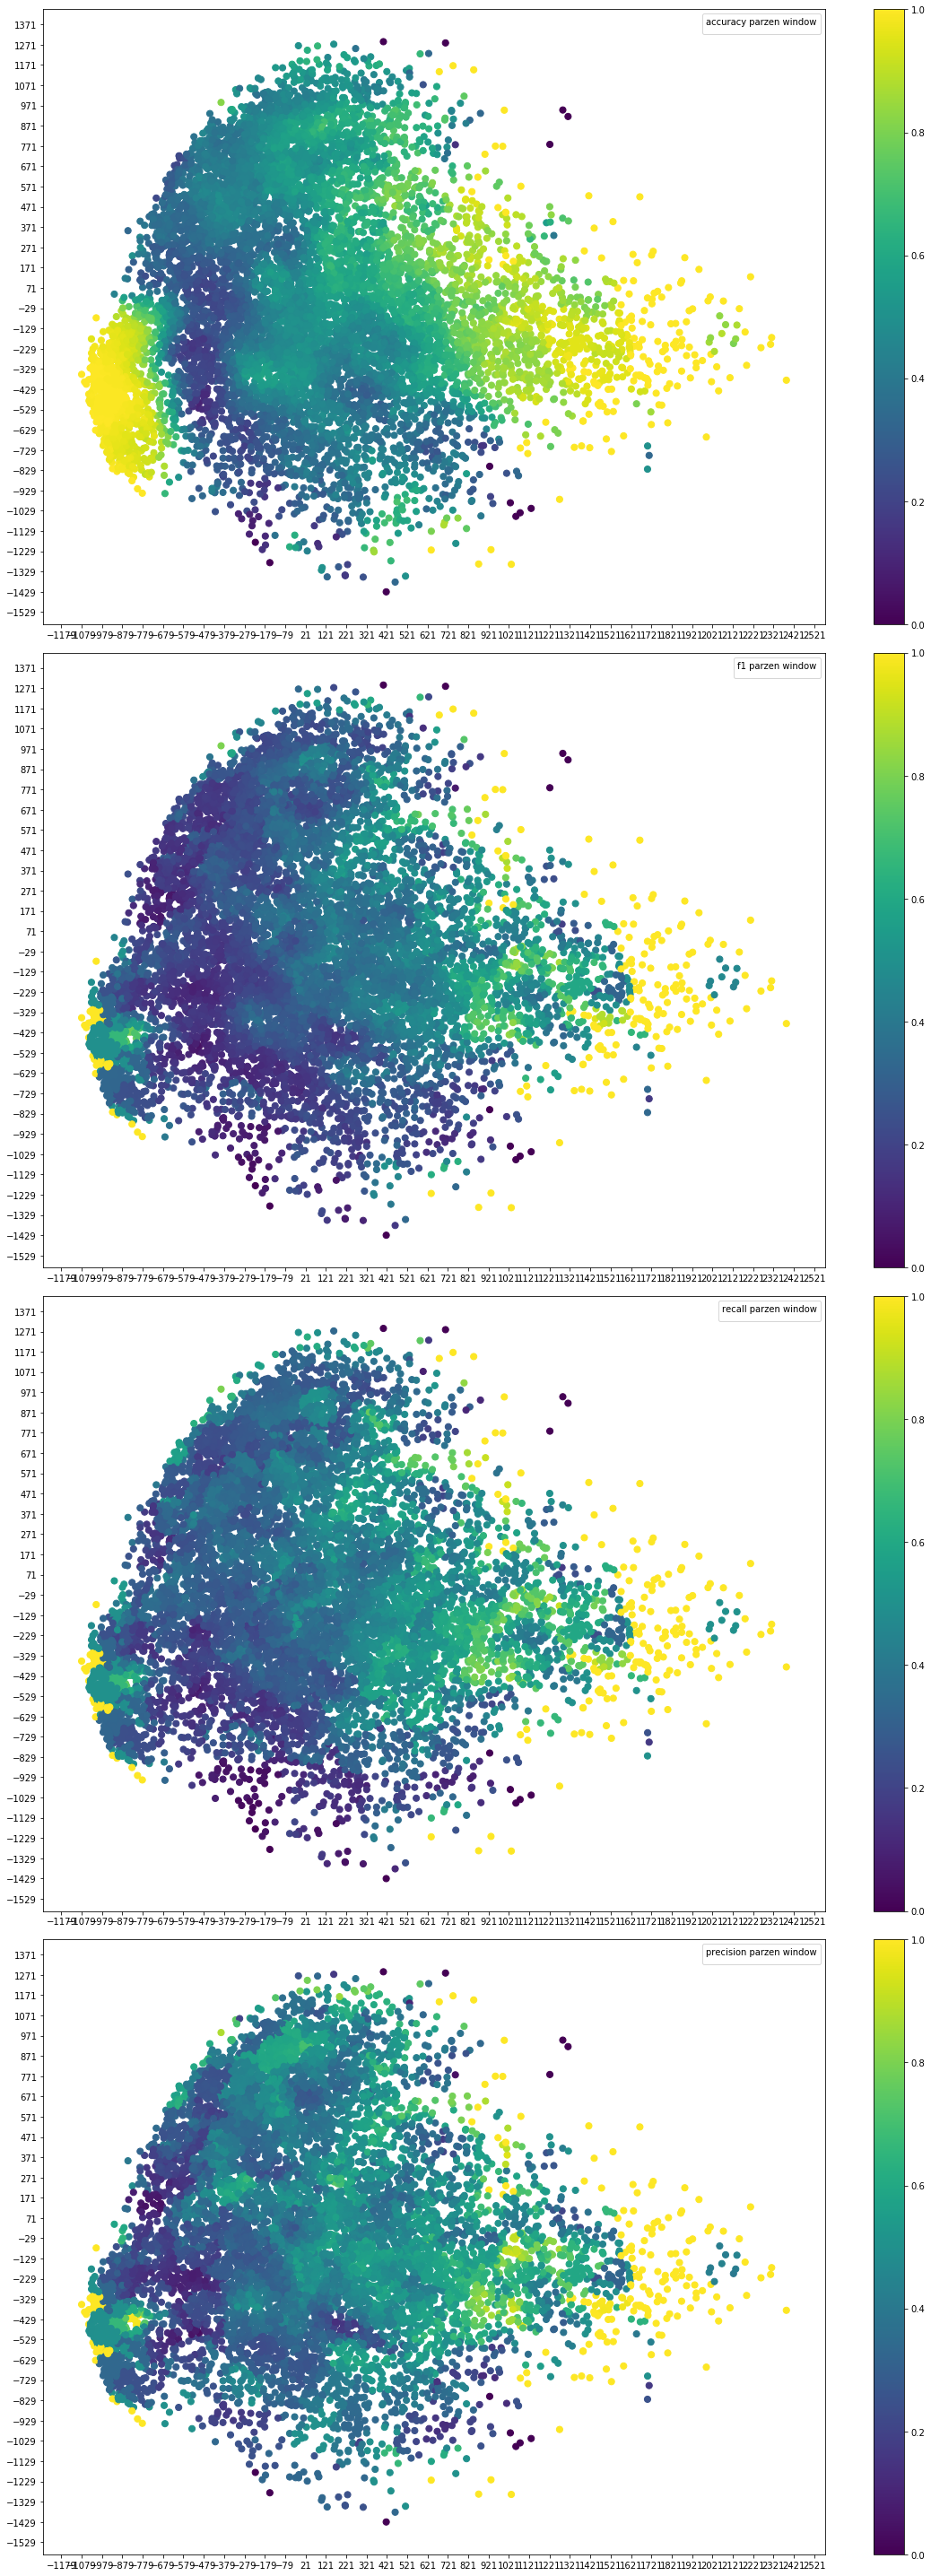

In [24]:
#XGB parzen plots
NB_zod.parzen_plot(metrics=["accuracy","f1","recall","precision"])